# Application of Natural Language Processing Methods (NLP):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import string

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# Load the dataset
df = pd.read_csv("fake_job_postings.csv")

# Define a function to clean the text data
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # convert all the text into lowercase
        text = text.strip()  # remove starting and trailing whitespaces
        special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
        text = re.sub(special_char_reg, ' ', text)
        text = re.sub(r'\s+', ' ', text) #remove all line formattings
        text = re.sub(r'\d+', '', text) #remove digits
        text = re.sub(r'\w*\d\w*', '', text)
        text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        text = ''.join(c for c in text if c not in string.punctuation)   #remove special symbols from job titles
        return text
    else:
        return ""

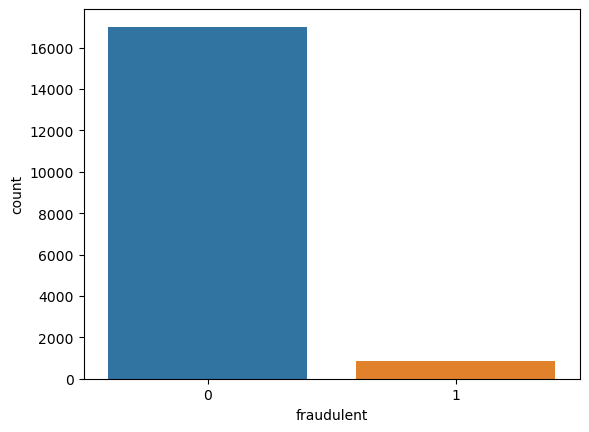

In [3]:
# Visualize the distribution of the target variable
sns.countplot(x="fraudulent", data=df)
plt.show()

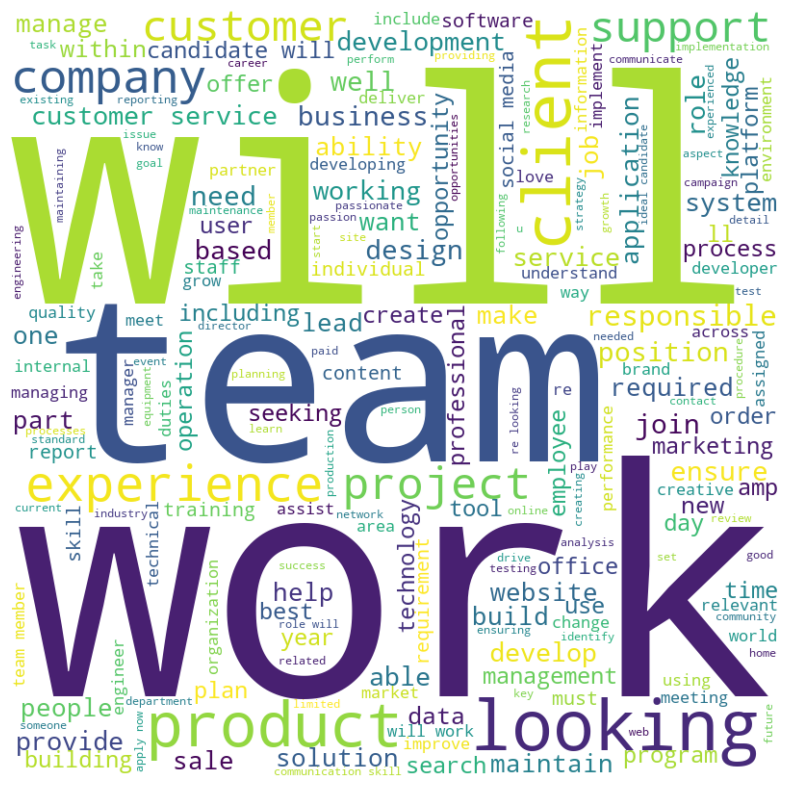

In [4]:
# Apply the function to the "description" column
df["description_clean"] = df["description"].apply(clean_text)

# Visualize the most common words using a word cloud
text = " ".join(df["description_clean"].dropna())
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

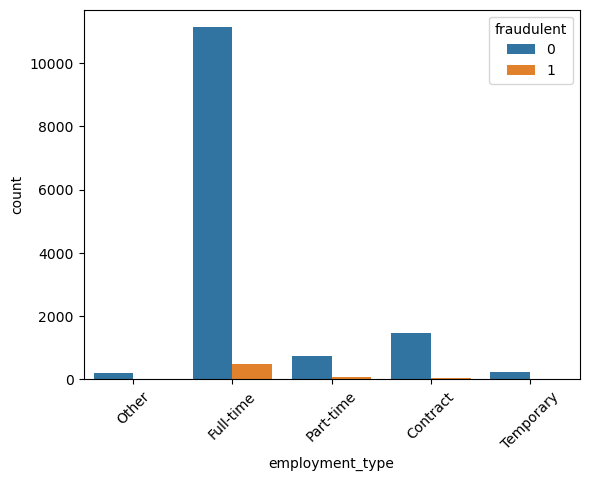

In [6]:
sns.countplot(x="employment_type", hue="fraudulent", data=df)
plt.xticks(rotation=45)
plt.show()

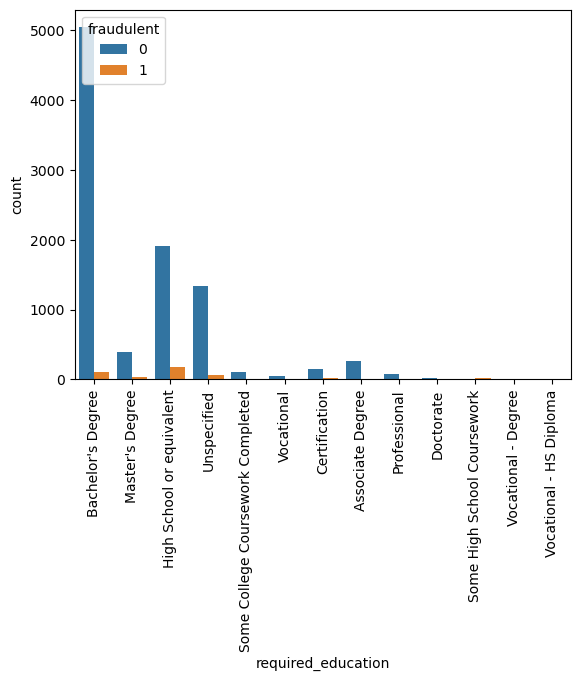

In [7]:
sns.countplot(x="required_education", hue="fraudulent", data=df)
plt.xticks(rotation=90)
plt.show()

In [8]:
print(df["description_clean"])

0        food a  james beard online food community and ...
1        organised  focused  vibrant  you have a passio...
2        our client located in houston is actively seek...
3        the company esri – environmental systems resea...
4        job title itemization review managerlocation f...
                               ...                        
17875    just in case this is the first time you’ve vis...
17876    the payroll accountant will focus primarily on...
17877    experienced project cost control staff enginee...
17878    nemsia studios is looking for an experienced d...
17879    who are is an award winning web based point of...
Name: description_clean, Length: 17880, dtype: object


In [9]:
# Prepare the data for training
X = df["description_clean"]
y = df["fraudulent"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["description_clean"], df["fraudulent"], test_size=0.2, random_state=42)

# Tokenize the text data
vocab_size = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [10]:
# Pad the sequences to ensure they are the same length
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding="post", truncating="post")

# Define the neural network architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [11]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))


Epoch 1/10
447/447 [==============================] - 16s 33ms/step - loss: 0.2183 - accuracy: 0.9506 - val_loss: 0.1872 - val_accuracy: 0.9511
Epoch 2/10
447/447 [==============================] - 19s 42ms/step - loss: 0.1534 - accuracy: 0.9618 - val_loss: 0.1703 - val_accuracy: 0.9525
Epoch 3/10
447/447 [==============================] - 21s 47ms/step - loss: 0.1102 - accuracy: 0.9699 - val_loss: 0.1499 - val_accuracy: 0.9631
Epoch 4/10
447/447 [==============================] - 23s 50ms/step - loss: 0.0833 - accuracy: 0.9765 - val_loss: 0.1532 - val_accuracy: 0.9592
Epoch 5/10
447/447 [==============================] - 23s 51ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.1477 - val_accuracy: 0.9664
Epoch 6/10
447/447 [==============================] - 23s 51ms/step - loss: 0.0474 - accuracy: 0.9827 - val_loss: 0.1436 - val_accuracy: 0.9625
Epoch 7/10
447/447 [==============================] - 23s 50ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.1374 - val_accuracy:

In the updated code, we first split the dataset into training and testing sets. We then tokenize the text data using the Tokenizer class from Keras, and pad the sequences to ensure they are the same length. We define a simple LSTM neural network architecture with an embedding layer, a dropout layer, and a dense output layer with a sigmoid activation function. We then compile and train the model using the training data,

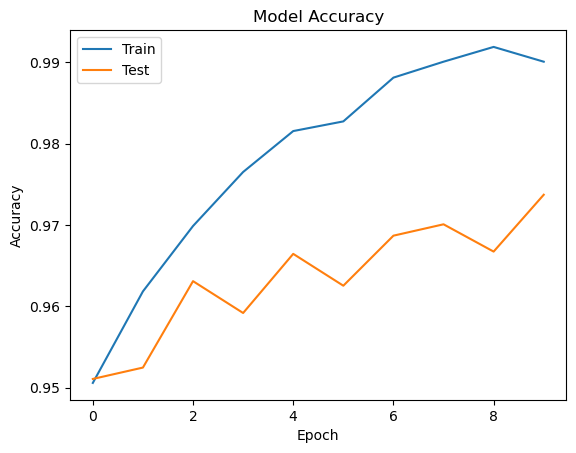

In [12]:
# Visualize the training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

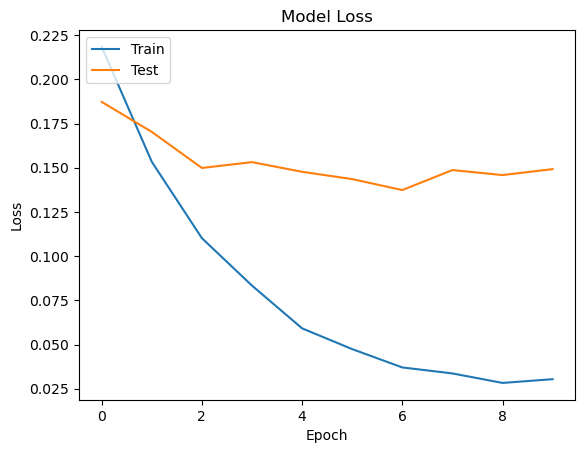

In [13]:
# Visualize the training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

112/112 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.85      0.59      0.69       181

    accuracy                           0.97      3576
   macro avg       0.91      0.79      0.84      3576
weighted avg       0.97      0.97      0.97      3576



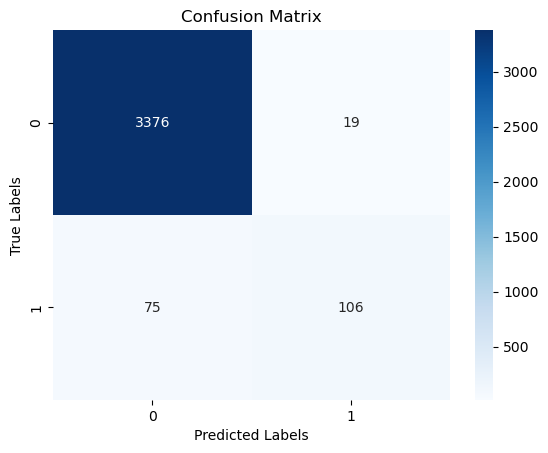

In [14]:
# Predict the test set labels
y_pred = model.predict(X_test_pad)

# Convert continuous predictions to binary labels
y_pred_bin = (y_pred > 0.5).astype(int)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_bin))
cm = confusion_matrix(y_test, y_pred_bin)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Application of Deep Learning Model: Convolutional neural networks

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input, concatenate
from tensorflow.keras.models import Model

In [16]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['description_clean'])
sequences = tokenizer.texts_to_sequences(df['description_clean'])
padded_sequences = pad_sequences(sequences, maxlen=1000)

# Split the dataset into training and testing sets
X_train = padded_sequences[:15000]
y_train = df['fraudulent'][:15000]
X_test = padded_sequences[15000:]
y_test = df['fraudulent'][15000:]

In [17]:
# Define the CNN architecture
input_layer = Input(shape=(1000,))
embedding_layer = Embedding(input_dim=5000, output_dim=32, input_length=1000)(input_layer)
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(embedding_layer)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1)
pool1 = GlobalMaxPooling1D()(conv2)
dense1 = Dense(units=64, activation='relu')(pool1)
output_layer = Dense(units=1, activation='sigmoid')(dense1)
model = Model(inputs=input_layer, outputs=output_layer)



In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
118/118 [==============================] - 14s 113ms/step - loss: 0.2187 - accuracy: 0.9651 - val_loss: 0.3806 - val_accuracy: 0.8809
Epoch 2/10
118/118 [==============================] - 12s 104ms/step - loss: 0.1164 - accuracy: 0.9651 - val_loss: 0.2935 - val_accuracy: 0.8809
Epoch 3/10
118/118 [==============================] - 13s 108ms/step - loss: 0.0888 - accuracy: 0.9651 - val_loss: 0.2844 - val_accuracy: 0.8809
Epoch 4/10
118/118 [==============================] - 12s 106ms/step - loss: 0.0696 - accuracy: 0.9725 - val_loss: 0.2979 - val_accuracy: 0.9132
Epoch 5/10
118/118 [==============================] - 12s 105ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.3813 - val_accuracy: 0.9226
Epoch 6/10
118/118 [==============================] - 12s 106ms/step - loss: 0.0199 - accuracy: 0.9947 - val_loss: 0.3699 - val_accuracy: 0.9181
Epoch 7/10
118/118 [==============================] - 13s 108ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.4433 - val_ac

In [19]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

90/90 [==============================] - 1s 13ms/step - loss: 0.6247 - accuracy: 0.9222
Test Loss: 0.6247249841690063, Test Accuracy: 0.9222221970558167


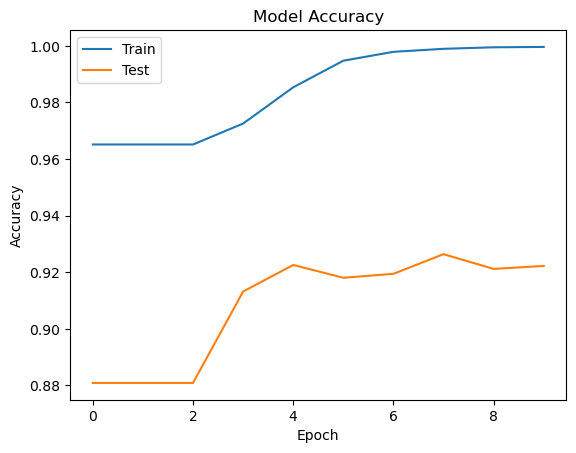

In [20]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()